In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import blpor as blpor
import p_ef as pef
import pandas as pd

### Obtener Retornos Equities & Market
- Un df de Equities (Últimos 3 años 02/28/2022 al 02/26/2025)
- Un Pandas Series de Market (Se utiliza después para calcular las betas). 

In [43]:
benchmark_returns = blpor.get_returns_spx()
asset_returns = blpor.get_returns_equities()
asset_returns.head(2)

,FEMSAUBD,ALFAA,FIBRAPL,CVX,INDA,EWU,GS,IVV,AXP,MCHI,IAU,LABB,LACOMUBC,FMTY14,BBVA,NAFTRAC,EWG,BBVANDQC
2022-03-15,0.000061,-0.008803,-0.001403,-0.033504,0.007569,-0.016129,-0.006553,0.015154,0.027394,-0.008512,-0.019841,0.014839,-0.017492,0.000000,0.013299,0.003964,0.003478,-0.017700
2022-03-16,-0.003343,0.024455,0.009976,-0.019935,0.004315,0.000000,0.032227,0.002242,-0.006502,0.175501,-0.008909,-0.005274,-0.000263,0.004127,0.032659,0.008255,0.032454,0.025117


### Retornos
1. Retornos Promedio 
2. Retornos CAPM
3. Análisis Estádistico y Supuestos de Normalidad

#### 1. Retornos Promedio
Obtenemos los retornos históricos de la serie. 

In [44]:
ex_rets_pue = blpor.annualize_rets(asset_returns, 252)
mean_rets = ex_rets_pue.to_frame(name='ER Mean') # to data frame
mean_rets

,ER Mean
FEMSAUBD,0.048976
ALFAA,-0.019099
FIBRAPL,0.039033
CVX,-0.118745
INDA,0.030865
EWU,0.015854
GS,0.084110
IVV,0.044411
AXP,0.069089
MCHI,-0.042096


#### 2. Retornos CAPM
- Betas:
  **(1) Betas Calculadas** Cálculo de acuerdo al SPX Index, últimos 3 años
  **(2)Betas Ajustadas Bloomberg** de acuerdo a la Terminal
- Risk Free Rate: Yield USGG3M Index (daily) de los últimos 3 años

A continuación observamos la diferencia entre las **Betas Calculadas** vs **Betas Ajustas de la Terminal - Bloomberg**

Existe una diferencia considerable (ver columna "Diferencia"), utilizaremos las Betas Ajustadas de Bloomberg

In [45]:
betas_calculadas = blpor.get_betas(benchmark_returns, asset_returns) 
betas_ajustadas_bloomberg = blpor.get_betas_bloomberg() 
blpor.get_betas_bloomberg_vs_calculadas(betas_ajustadas_bloomberg, betas_calculadas)

,Beta (Calculada SPX Index),Beta Adj Bloomberg,Diferencia
FEMSAUBD,0.028853,0.30,939.77%
ALFAA,0.057883,0.47,711.98%
FIBRAPL,-0.008976,0.48,-5447.46%
CVX,0.174250,0.81,364.85%
INDA,0.068767,0.49,612.55%
EWU,0.118835,0.95,699.43%
GS,0.129176,1.31,914.12%
IVV,0.103037,1.24,1103.45%
AXP,0.107298,1.09,915.86%
MCHI,0.115947,0.13,12.12%


Aquí tenemos que obtener el **RF** a partir de la **TIIE** durante el mismo periodo de los Retornos de los Activos

In [46]:
# hay que cambiarla por la TIIE. Conseguir datos históricos 
# usgg3m_rf = blpor.usgg3m_risk_free_rate()
# print(f"Risk-free rate: {usgg3m_rf:.5%}")

Finalmente con las **Betas Ajustadas de Bloomberg** calculamos el **ER CAPM**

In [47]:
capm_rets = blpor.rets_capm_rfmanual(betas_ajustadas_bloomberg, benchmark_returns, risk_free_rate=0.095, periods_per_year=252)
capm_rets

,ER CAPM
FEMSAUBD,0.084834
ALFAA,0.079073
FIBRAPL,0.078734
CVX,0.067551
INDA,0.078395
EWU,0.062807
GS,0.050608
IVV,0.052980
AXP,0.058063
MCHI,0.090595


Ahora comparamos los **Retornos Históricos vs Retornos CAPM**

In [48]:
blpor.compare_mean_capm_returns(mean_rets, capm_rets)

alt.Chart(...)

#### SML
- primero obtenemos el retorno de los 3 años del SPX Index. Este Retorno fue de **9.19%**
- usando este retorno y el del Risk Free Rate del USGG3M obtenemos la SML 

In [49]:
spx_return = blpor.annualize_return_benchmark(returns_series=benchmark_returns, periods_in_year=252)

En el gráfico se observan los **Retornos CAPM** sobre la línea y los **Retornos Promedio Históricos** (color rosa)

In [50]:
blpor.plot_security_market_line_enhanced_manual_market_return_h_2(expected_returns_df=mean_rets, 
                                                                  expected_returns_df_2=capm_rets, 
                                                                  market_return=spx_return, 
                                                                  risk_free_rate=0.095, 
                                                                  betas_df=betas_ajustadas_bloomberg
                                                                  , betas_df_2=betas_ajustadas_bloomberg)

alt.LayerChart(...)

#### 3. Análisis Estádistico y Supuestos de Normalidad

Análisis: Skewnnes, Kurtosis, VaR y Sharpe Ratio

In [51]:
summary = pef.summary_stats(r=asset_returns, riskfree_rate=0.85)
summary = summary.drop(['Annualized Return', 'Max Drawdown'], axis=True)
summary

,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio
FEMSAUBD,0.232243,-0.438193,10.083933,0.023430,0.032289,-1.867919
ALFAA,0.297290,1.025235,11.507786,0.021650,0.037682,-1.583175
FIBRAPL,0.298301,0.319285,5.350104,0.027930,0.039788,-1.472384
CVX,0.290266,-0.298109,5.744921,0.030896,0.042268,-1.807170
INDA,0.188178,0.132315,8.470894,0.017538,0.028140,-2.357331
EWU,0.188311,0.262012,6.967412,0.017520,0.027968,-2.398788
GS,0.292376,0.199775,11.212222,0.025676,0.042510,-1.418798
IVV,0.178552,0.018471,7.823976,0.017100,0.025139,-2.443347
AXP,0.299697,0.033244,8.130693,0.028458,0.042783,-1.411268
MCHI,0.325509,0.903398,12.624293,0.024113,0.041188,-1.484178


Aquí se puede ver el análisis estadístico de los retornos de cada activo, en un **Histograma**

Ahora obtenemos **QQ Plots** y **Box Plots** de cada activo 

In [52]:
## blpor.generar_histogramas_retornos(asset_returns)

In [53]:
## blpor.generar_graficos_normalidad_altair(asset_returns)

### Riesgo
1. Matriz de Correlación
2. Volatilidad
3. Volatilidad vs Retorno CAPM
4. Drawdown
5. VaR

#### 1. Matriz de Correlación

In [54]:
corr = asset_returns.corr()
corr_matrix = corr.style.map(blpor.color_negative_red)
corr_matrix

,FEMSAUBD,ALFAA,FIBRAPL,CVX,INDA,EWU,GS,IVV,AXP,MCHI,IAU,LABB,LACOMUBC,FMTY14,BBVA,NAFTRAC,EWG,BBVANDQC
FEMSAUBD,1.000000,0.129266,0.118019,-0.002500,0.031131,0.072906,0.132842,0.181875,0.093655,0.079935,0.000597,0.145840,0.129160,0.008463,0.113709,0.487098,0.159044,-0.023917
ALFAA,0.129266,1.000000,0.167298,0.044332,0.042144,0.073341,0.080097,0.107905,0.068817,0.171698,0.001715,0.189839,0.252224,0.066141,0.125286,0.431632,0.089542,0.060958
FIBRAPL,0.118019,0.167298,1.000000,0.021338,0.023321,0.022033,0.072888,0.057512,0.079018,0.141470,-0.116421,0.193654,0.178100,0.110032,0.055383,0.367752,0.097803,-0.002222
CVX,-0.002500,0.044332,0.021338,1.000000,0.142759,0.122690,0.105308,0.156269,0.102755,0.075849,0.062168,0.023177,0.030945,0.032046,0.070386,0.060707,0.145520,0.073471
INDA,0.031131,0.042144,0.023321,0.142759,1.000000,0.032310,0.105339,0.067694,0.040000,0.000866,-0.011378,0.026861,-0.032089,-0.014873,0.095905,0.069588,0.075940,0.017295
EWU,0.072906,0.073341,0.022033,0.122690,0.032310,1.000000,0.283214,0.348253,0.274234,0.196714,0.221469,0.021487,-0.007507,-0.077662,0.275355,0.119156,0.419489,0.218224
GS,0.132842,0.080097,0.072888,0.105308,0.105339,0.283214,1.000000,0.460715,0.459877,0.115924,0.051956,0.057925,0.031674,-0.014669,0.155835,0.239944,0.263569,0.126195
IVV,0.181875,0.107905,0.057512,0.156269,0.067694,0.348253,0.460715,1.000000,0.566052,0.250056,0.198821,0.087313,0.014912,-0.087386,0.212181,0.230402,0.455966,0.008985
AXP,0.093655,0.068817,0.079018,0.102755,0.040000,0.274234,0.459877,0.566052,1.000000,0.115955,0.069023,0.115971,0.032265,-0.022869,0.201517,0.219231,0.310101,0.104512
MCHI,0.079935,0.171698,0.141470,0.075849,0.000866,0.196714,0.115924,0.250056,0.115955,1.000000,0.142967,0.056746,0.078226,-0.003357,0.126468,0.245625,0.292844,0.032244


#### 2. Volatilidad

In [55]:
annual_vol = blpor.annualize_vol(asset_returns, 252)
annual_vol

,volatility
FEMSAUBD,0.232243
ALFAA,0.297290
FIBRAPL,0.298301
CVX,0.290266
INDA,0.188178
EWU,0.188311
GS,0.292376
IVV,0.178552
AXP,0.299697
MCHI,0.325509


In [56]:
blpor.compare_capmrets_vol(annual_vol, capm_rets)

alt.Chart(...)

#### 3. Drawdown
Se crean dos librerías (1) Wealth Index y Peaks y (2) Drawdown para mostrar de cada activo: 
1. **Max Drawdown**: Se despliega de cada Equity la máxima caída y su fecha (cuando)
2. **Wealth Index vs Peaks**: Se visualizan gráficamente 1,000 USD invertidos a lo largo de los 3 años con sus "Peaks"
3. **Drawdown**: Se observan las "caídas" durante estos 3 años

In [57]:
wealth_peaks = blpor.wealth_peaks(asset_returns) # Obtener Wealth Index y Peaks de cada activo en Series
drawdown_equities = blpor.drawdown_equities(asset_returns) # Obtener Drawdown de cada activo en Series

KeyError: 'BBVANDQC'

In [ ]:
blpor.generar_dataframe_max_drawdown(drawdown_equities)

In [ ]:
chart_abt_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'FEMSAUBD')
chart_abt_d = blpor.graficar_drawdown(drawdown_equities, 'FEMSAUBD')
chart_abt_wp.display()
chart_abt_d.display()

In [ ]:
chart_axp_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'ALFAA')
chart_axp_d = blpor.graficar_drawdown(drawdown_equities, 'ALFAA')
chart_axp_wp.display()
chart_axp_d.display()

In [ ]:
chart_cvx_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'FIBRAPL')
chart_cvx_d = blpor.graficar_drawdown(drawdown_equities, 'FIBRAPL')
chart_cvx_wp.display()
chart_cvx_d.display()

In [ ]:
chart_dd_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'CVX')
chart_dd_d = blpor.graficar_drawdown(drawdown_equities, 'CVX')
chart_dd_wp.display()
chart_dd_d.display()

In [ ]:
chart_meta_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'INDA')
chart_meta_d = blpor.graficar_drawdown(drawdown_equities, 'INDA')
chart_meta_wp.display()
chart_meta_d.display()

In [ ]:
chart_pld_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'EWU')
chart_pld_d = blpor.graficar_drawdown(drawdown_equities, 'EWU')
chart_pld_wp.display()
chart_pld_d.display()

In [ ]:
chart_vz_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'GS')
chart_vz_d = blpor.graficar_drawdown(drawdown_equities, 'GS')
chart_vz_wp.display()
chart_vz_d.display()

In [ ]:
chart_ivv_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'IVV')
chart_ivv_d = blpor.graficar_drawdown(drawdown_equities, 'IVV')
chart_ivv_wp.display()
chart_ivv_d.display()

In [ ]:
chart_axp_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'AXP')
chart_axp_d = blpor.graficar_drawdown(drawdown_equities, 'AXP')
chart_axp_wp.display()
chart_axp_d.display()

In [ ]:
chart_mchi_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'MCHI')
chart_mchi_d = blpor.graficar_drawdown(drawdown_equities, 'MCHI')
chart_mchi_wp.display()
chart_mchi_d.display()

In [ ]:
chart_iau_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'IAU')
chart_iau_d = blpor.graficar_drawdown(drawdown_equities, 'IAU')
chart_iau_wp.display()
chart_iau_d.display()

#### 4. VaR & VaR Gaussian
- **VaR Gaussian**: Asume que los rendimientos de los activos tienen una distribución normal.
-  Se asume un intervalo de confianza del 5%
- Entre más diferencia exista, menos se ajustan los retornos a una distribución normal.
- Si el **VaR histórico** es mayor que el **VaR gaussiano** podría indicar que los rendimientos de esos activos tienen "colas pesadas", lo que significa que hay una mayor probabilidad de eventos extremos de lo que predice la distribución normal.
- **Interpretación**. Por ejemplo para ABT:
**VaR Gaussiano (2.13)**:Esto significa que, según el modelo gaussiano, existe un 5% de probabilidad de que la pérdida en el activo ABT supere el 2.13% en **un día**.
**VaR Histórico (2.07)**:
Esto significa que, según los datos históricos, el 5% de los peores rendimientos del activo ABT resultaron en una pérdida del 2.07% o más **en un día**.

In [58]:
var = pd.Series(blpor.var_historic(asset_returns, level=5)*100, name='VaR')
var_gaussian = pd.Series(blpor.var_gaussian(asset_returns, modified=True)*100, name='VaR')
var = pd.DataFrame(var)
var_gaus = pd.DataFrame(var_gaussian)

In [59]:
blpor.compare_var_vargaus(var, var_gaus)

alt.Chart(...)

### Portafolio Eficiente
1. Frontera Eficiente. 
2. Portafolio de mínima varianza (sin restricciones)
3. Portafolio de mínima varianza con Restricciones (1) no ventas en corto y (2) invertir mínimo el 2% en cada uno de los 10 activos. Con esta última queremos asegurar que tendremos exposición a todas las correlaciones existentes por este portafolio de 10 activos. 

#### 1. Frontera Eficiente
Es importante notar que el máximo retorno que podemos generar con nuestro portafolio es de 10.10% esto se observa en donde termina la curva justo donde la esta el activo PLD

In [60]:
cov = asset_returns.cov()*252 # Obtener la matriz de covarianza
er =  capm_rets['ER CAPM'] # convertir capm rets a p.series

- **Portafolio de Mínima Varianza (gmv)**: azul, 
- **Portafolio Equally Weighted (ew)**: amarillo
- **Portafolio de Tangencia**: morado

<Axes: xlabel='Volatility'>

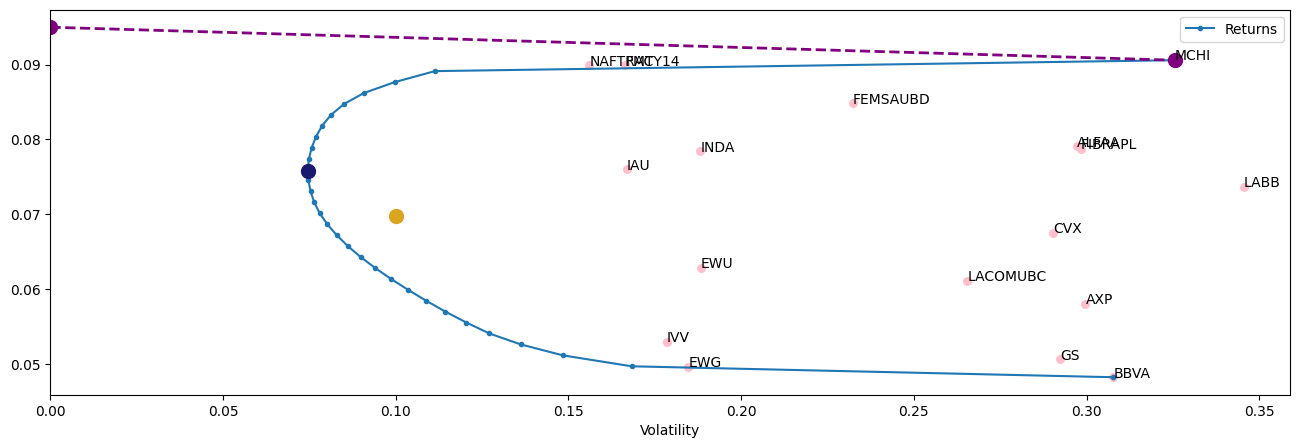

In [61]:
blpor.plot_rigs_ef(rets_p=asset_returns, n_points=30, er=er, cov=cov, 
                   show_cml=True, show_p=True, style='.-', riskfree_rate=0.095, show_ew=True, show_gmv=True)

Este de aquí abajo es solo un intento de mejorar las visualizaciones del gráfico anterior. Sigue en proceso.

In [62]:
chart = blpor.plot_rigs_ef_altair_test(rets_p=asset_returns, n_points=400, er=er, cov=cov, 
                   show_cml=True, show_p=True, riskfree_rate=0.095, show_ew=True, show_gmv=True)
chart.display()

alt.LayerChart(...)

- Aquí introducimos manualmente el **retorno esperado** que queremos de nuestro portafolio. Dado el gráfico anterior podemos observar que el máximo retorno que podemos introducir sería hasta 10.101%. Entonces podremos configurar diferentes portafolio de 0% a 10.10%
- Para este caso **utilizaremos el portafolio de mínima varianza (gmv)** que tiene un retorno esperado de aproximadamente **7.17%**. Este portafolio nos da una **mínima varianza de 13.45%**
- **Mostramos los pesos necesarios** (sin restricciones) para lograr este portafolio.
- Dado que no contamos con retornos negativos **no contamos con ventas en corto**, aún sin estar construyendo la resticción wi>=0

#### 2. Portafolios y sus pesos 
De acuerdo al gráfico de la frontera eficiente, sabemos que el **portafolio de mínima varianza** se encuentra en **el punto azul** justo en la punta de la curva. Veamos que sucede:

Si obtenemos los pesos del porfaolio del **punto azul** sin restricciones

In [69]:
blpor.get_portafolio_pesos_sin_restriccion_suma(er, cov)

Introducir el Retorno Esperado del Portafolio:
 0.0697


Retorno Esperado: 7.000000000000001 %

Holding Portafolio de Mínima Varianza: 10.0 %

Pesos para obtener un retorno de 7.000000000000001 %:



,secs,weights %
0,FEMSAUBD,5.55
1,ALFAA,5.55
2,FIBRAPL,5.55
3,CVX,5.55
4,INDA,5.55
5,EWU,5.55
6,GS,5.55
7,IVV,5.55
8,AXP,5.55
9,MCHI,5.55


Aplicando **1 restricción**: El mismo retorno (7.19%), pero **mínima varianza**. por lo mismo la varianza baja de 14.97% (sin restricciones) a 13.45% (restricción mínima varianza)

In [65]:
blpor.get_minima_varianza_portafolio(er=er, cov=cov)

Introducir el Retorno Esperado del Portafolio:
 0.09


Retorno Esperado: 9.0 %

Holding Portafolio de Mínima Varianza: 11.98 %

Pesos para obtener un retorno de 9.0 %:



,secs,weights %
0,FEMSAUBD,0.0
1,ALFAA,0.0
2,FIBRAPL,0.0
3,CVX,0.0
4,INDA,0.0
5,EWU,0.0
6,GS,0.0
7,IVV,0.0
8,AXP,0.0
9,MCHI,12.0


Ahora analizamos los pesos con **2 restricciones**: **(1)** mínima varianza y **(2)** se tiene que invertir mínimo 3% en cada activo.

In [66]:
blpor.get_minima_varianza_portafolio_2pct(er=er, cov=cov)

Introducir el Retorno Esperado del Portafolio:
 0.09


Retorno Esperado: 7.6 %

Holding Portafolio Varianza: 13.94 %

Pesos para obtener un retorno de 7.6 %:



,secs,weights %
0,FEMSAUBD,4.0
1,ALFAA,4.0
2,FIBRAPL,4.0
3,CVX,4.0
4,INDA,4.0
5,EWU,4.0
6,GS,4.0
7,IVV,4.0
8,AXP,4.0
9,MCHI,32.0


Finalmente a manera de comprobación. Usamos aquí **1 restricción** que es: el **peso de todos los activos suman 100%** En nuesta gráfica de **La Frontera eficiente** podemos ver en color amarillo el **EW portfolio** (10% de peso en cada activo) para corroborar que esto es real. Vemos (el punto amarillo del gráfico) que el EW portfolio tienen un rendimeinto esperado de 8.449%, así que sometemos a prueba aquí ala función

In [67]:
blpor.get_portafolio_pesos(er=er, cov=cov)

Introducir el Retorno Esperado del Portafolio:
 0.09


Retorno Esperado: 9.0 %

Holding Portafolio de Mínima Varianza: 12.45 %

Pesos para obtener un retorno de 9.0 %:



,secs,weights %
0,FEMSAUBD,14.04
1,ALFAA,10.79
2,FIBRAPL,10.60
3,CVX,4.29
4,INDA,10.41
5,EWU,1.62
6,GS,-5.26
7,IVV,-3.92
8,AXP,-1.06
9,MCHI,17.28


In [68]:
# Optimal weights for a max sharpe ratio portfolio?
weights_msrp = blpor.msr(0.1, er=er, cov=cov).round(5)*100
# Turn weights10 array into a list
list_2 = weights_msrp.tolist()
# Show secs and w lists as a df
secs_msr = pd.Series(p_all, name='secs')
weights_msr = pd.Series(weights_msrp.round(2), name='weights msr %')
secs_weights=pd.concat([secs_msr,weights_msr],axis=1)
secs_weights

NameError: name 'p_all' is not defined